# 🧬 YARA - Análise de Rarefação

**Autor:** Projeto YARA - IFAM  
**Data:** Outubro 2025  
**Kernel:** Python (YARA Notebooks)  

## 📋 Objetivo

Analisar curvas de rarefação para determinar se a profundidade de sequenciamento foi adequada para capturar a diversidade microbiana das amostras.

## 📊 O que é Rarefação?

Rarefação é uma técnica para avaliar se o esforço de sequenciamento foi suficiente. Curvas de rarefação mostram como o número de espécies observadas aumenta conforme mais sequências são analisadas.

**Interpretação:**
- **Curva saturada (plateau):** Sequenciamento adequado, maioria das espécies detectadas
- **Curva não saturada:** Sequenciamento insuficiente, muitas espécies não detectadas

---

## 1. Importar Bibliotecas

In [2]:
# Adicionar caminho do projeto
import sys
from pathlib import Path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

# Importar módulos YARA
from actions.utils.rarefaction_analyzer import (
    RarefactionAnalyzer,
    load_rarefaction_data,
    analyze_rarefaction_file
)

# Bibliotecas padrão
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

print('✅ Bibliotecas importadas com sucesso!')

✅ Bibliotecas importadas com sucesso!


## 2. Carregar Dados de Rarefação

In [3]:
# Caminho para dados
DATA_PATH = '../data/qiime2/'

# Listar arquivos de rarefação disponíveis
rarefaction_files = list(Path(DATA_PATH).glob('*rarefaction*.tsv')) + \
                   list(Path(DATA_PATH).glob('*rarefacao*.tsv'))

if rarefaction_files:
    print(f'📊 Arquivos de rarefação encontrados:')
    for f in rarefaction_files:
        print(f'  • {f.name}')
    
    # Carregar primeiro arquivo
    rarefaction_file = rarefaction_files[0]
    print(f'\n📂 Carregando: {rarefaction_file.name}')
    
    df_rarefaction = load_rarefaction_data(str(rarefaction_file))
    
    print(f'✅ Dados carregados: {df_rarefaction.shape[0]} amostras x {df_rarefaction.shape[1]} profundidades')
    print(f'\nProfundidades testadas: {list(df_rarefaction.columns)}')
else:
    print('❌ Nenhum arquivo de rarefação encontrado em', DATA_PATH)
    print('\n💡 Dica: Exporte curvas de rarefação do QIIME 2 e salve como rarefaction.tsv')

📊 Arquivos de rarefação encontrados:
  • rarefaction.tsv

📂 Carregando: rarefaction.tsv
✅ Dados carregados: 15 amostras x 11 profundidades

Profundidades testadas: ['1000', '5000', '10000', '15000', '20000', '25000', '30000', '35000', '40000', '45000', '50000']


In [4]:
# Visualizar primeiras linhas
if 'df_rarefaction' in locals():
    display(df_rarefaction.head())

,1000,5000,10000,15000,20000,25000,30000,35000,40000,45000,50000
sample-id,,,,,,,,,,,
amostra_001,47.520412,163.752369,202.803619,215.046612,219.150717,225.177271,225.569021,224.779041,219.359552,218.969338,224.273939
amostra_002,23.308595,89.542452,130.592156,141.770274,151.658077,159.672316,155.508358,155.765803,160.146564,164.604670,160.259436
amostra_003,48.735397,164.353746,203.514291,218.019188,220.396104,217.104431,215.076959,223.609176,215.402347,223.663621,222.601041
amostra_004,69.101428,234.941640,303.586494,321.019083,330.891583,331.700842,330.944268,333.595746,337.462272,332.613010,333.807596
amostra_005,74.421782,236.201474,290.690320,312.683129,312.628927,316.919219,310.158403,308.619080,316.235453,317.093142,311.021728


## 3. Criar Analisador de Rarefação

In [5]:
if 'df_rarefaction' in locals():
    # Criar analisador
    analyzer = RarefactionAnalyzer(df_rarefaction)
    
    print('✅ Analisador criado com sucesso!')
    print(f'📊 Amostras: {len(analyzer.sample_ids)}')
    print(f'📏 Profundidades: {len(analyzer.depths)}')

✅ Analisador criado com sucesso!
📊 Amostras: 15
📏 Profundidades: 11


## 4. Estatísticas Gerais

In [6]:
if 'analyzer' in locals():
    # Obter estatísticas
    stats = analyzer.get_summary_stats()
    
    print('📊 ESTATÍSTICAS DE RAREFAÇÃO')
    print('=' * 50)
    print(f'\nTotal de amostras: {stats["total_samples"]}')
    print(f'\nFaixa de profundidades:')
    print(f'  • Mínima: {stats["depth_range"]["min"]} sequências')
    print(f'  • Máxima: {stats["depth_range"]["max"]} sequências')
    print(f'\nSaturação:')
    print(f'  • Média: {stats["saturation"]["mean"]:.1%}')
    print(f'  • Mediana: {stats["saturation"]["median"]:.1%}')
    print(f'  • Amostras saturadas (>95%): {stats["saturation"]["samples_saturated"]}')

📊 ESTATÍSTICAS DE RAREFAÇÃO

Total de amostras: 15

Faixa de profundidades:
  • Mínima: 1000 sequências
  • Máxima: 50000 sequências

Saturação:
  • Média: 98.6%
  • Mediana: 99.3%
  • Amostras saturadas (>95%): 15


## 5. Recomendação de Profundidade

In [7]:
if 'analyzer' in locals():
    # Obter recomendação
    recommendation = analyzer.recommend_sampling_depth(min_samples_retained=0.8)
    
    print('💡 RECOMENDAÇÃO DE PROFUNDIDADE')
    print('=' * 50)
    
    if recommendation['recommended_depth']:
        print(f'\n✅ Profundidade recomendada: {recommendation["recommended_depth"]} sequências')
        print(f'\n📊 Amostras mantidas: {recommendation["samples_retained"]} de {stats["total_samples"]}')
        
        if recommendation['samples_discarded']:
            print(f'\n⚠️ Amostras descartadas ({len(recommendation["samples_discarded"])}):')
            for sample in recommendation['samples_discarded'][:5]:
                print(f'  • {sample}')
            if len(recommendation['samples_discarded']) > 5:
                print(f'  ... e mais {len(recommendation["samples_discarded"]) - 5}')
        
        print(f'\n📝 Razão: {recommendation["reason"]}')
    else:
        print(f'\n❌ {recommendation["reason"]}')

💡 RECOMENDAÇÃO DE PROFUNDIDADE

✅ Profundidade recomendada: 50000 sequências

📊 Amostras mantidas: 15 de 15

📝 Razão: Profundidade 50000 oferece melhor balanço entre saturação (25303.52%) e retenção de amostras


## 6. Análise por Amostra

In [8]:
if 'analyzer' in locals():
    # Analisar primeiras 5 amostras
    print('🔍 ANÁLISE POR AMOSTRA')
    print('=' * 50)
    
    for sample_id in analyzer.sample_ids[:5]:
        saturation = analyzer.calculate_saturation(sample_id)
        plateau_depth = analyzer.get_plateau_depth(sample_id)
        
        print(f'\n📊 {sample_id}')
        print(f'  • Saturação: {saturation:.1%}')
        
        if plateau_depth:
            print(f'  • Plateau em: {plateau_depth} sequências')
        else:
            print(f'  • Plateau: Não atingido')
        
        # Status
        if saturation > 0.95:
            print(f'  • Status: ✅ Saturada')
        elif saturation > 0.80:
            print(f'  • Status: ⚠️ Parcialmente saturada')
        else:
            print(f'  • Status: ❌ Não saturada')

🔍 ANÁLISE POR AMOSTRA

📊 amostra_001
  • Saturação: 97.6%
  • Plateau em: 15000 sequências
  • Status: ✅ Saturada

📊 amostra_002
  • Saturação: 97.3%
  • Plateau em: 25000 sequências
  • Status: ✅ Saturada

📊 amostra_003
  • Saturação: 99.5%
  • Plateau em: 15000 sequências
  • Status: ✅ Saturada

📊 amostra_004
  • Saturação: 99.6%
  • Plateau em: 15000 sequências
  • Status: ✅ Saturada

📊 amostra_005
  • Saturação: 98.0%
  • Plateau em: 15000 sequências
  • Status: ✅ Saturada


## 7. Visualização das Curvas


✅ Gráfico salvo em: ../data/qiime2/rarefaction_analysis.png


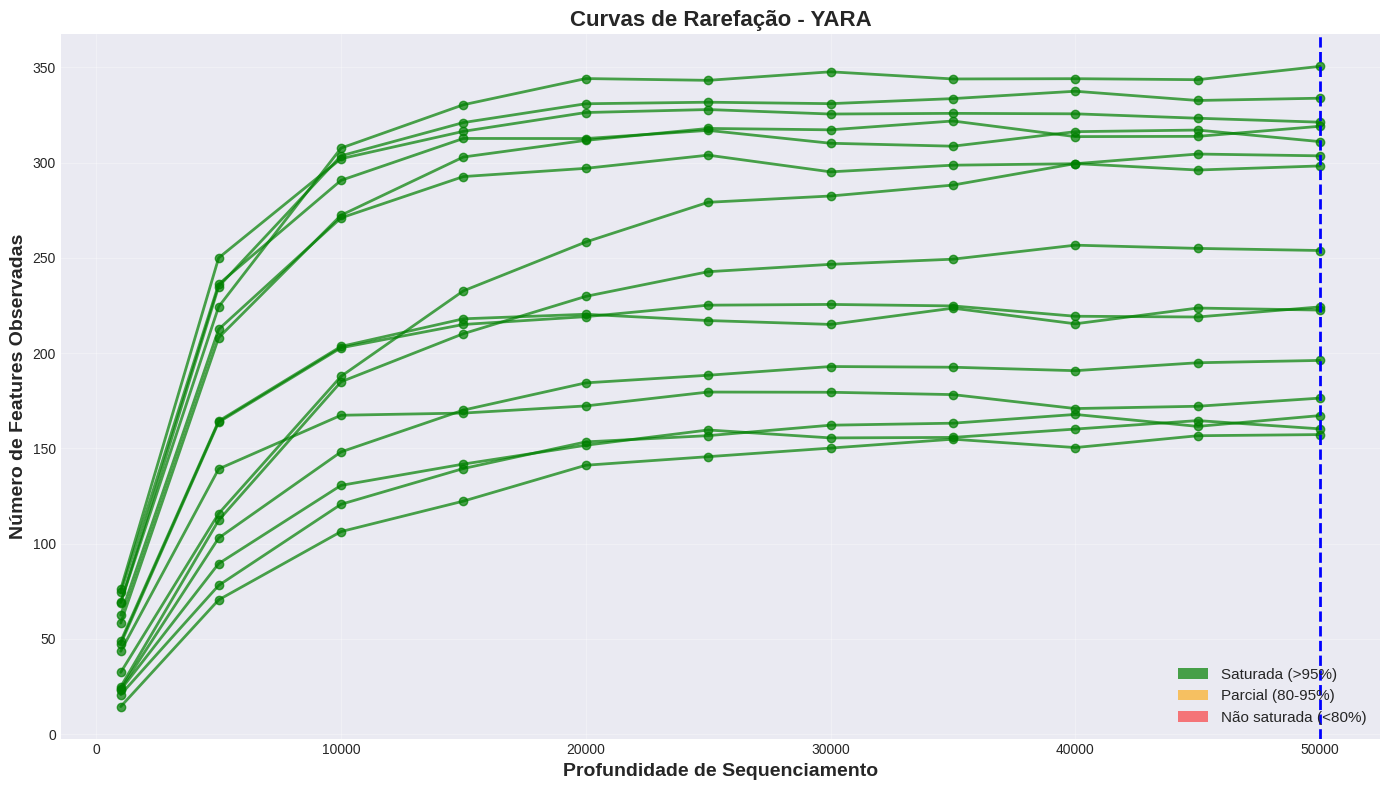

In [9]:
if 'analyzer' in locals():
    # Plotar curvas de rarefação
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Plotar até 20 amostras para não poluir o gráfico
    samples_to_plot = analyzer.sample_ids[:20]
    
    for sample_id in samples_to_plot:
        sample_data = df_rarefaction.loc[sample_id]
        depths_numeric = [int(d) for d in analyzer.depths]
        
        # Colorir por saturação
        saturation = analyzer.calculate_saturation(sample_id)
        
        if saturation > 0.95:
            color = 'green'
            alpha = 0.7
        elif saturation > 0.80:
            color = 'orange'
            alpha = 0.6
        else:
            color = 'red'
            alpha = 0.5
        
        ax.plot(depths_numeric, sample_data.values, 
               marker='o', alpha=alpha, color=color, linewidth=2)
    
    # Adicionar linha de recomendação
    if recommendation['recommended_depth']:
        ax.axvline(x=recommendation['recommended_depth'], 
                  color='blue', linestyle='--', linewidth=2,
                  label=f'Profundidade Recomendada: {recommendation["recommended_depth"]}')
    
    ax.set_xlabel('Profundidade de Sequenciamento', fontsize=14, fontweight='bold')
    ax.set_ylabel('Número de Features Observadas', fontsize=14, fontweight='bold')
    ax.set_title('Curvas de Rarefação - YARA', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=12)
    
    # Legenda de cores
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor='green', alpha=0.7, label='Saturada (>95%)'),
        Patch(facecolor='orange', alpha=0.6, label='Parcial (80-95%)'),
        Patch(facecolor='red', alpha=0.5, label='Não saturada (<80%)')
    ]
    ax.legend(handles=legend_elements, loc='lower right', fontsize=11)
    
    plt.tight_layout()
    
    # Salvar
    output_path = Path(DATA_PATH) / 'rarefaction_analysis.png'
    plt.savefig(output_path, dpi=300, bbox_inches='tight')
    print(f'\n✅ Gráfico salvo em: {output_path}')
    
    plt.show()

## 8. Interpretação Textual

In [10]:
if 'analyzer' in locals():
    # Gerar interpretação
    interpretation = analyzer.interpret_rarefaction()
    
    print(interpretation)

📊 **Análise de Rarefação - Visão Geral**

🔢 Total de amostras: **15**
📏 Profundidades testadas: **1000 - 50000**

📈 Saturação média: **98.6%**
✅ Amostras saturadas (>95%): **15** de **15**

💡 **Recomendação de Profundidade:**
• Profundidade ideal: **50000 sequências**
• Amostras mantidas: **15** de **15**



## 9. Exportar Resultados

In [11]:
if 'analyzer' in locals():
    # Criar DataFrame com resultados
    results_data = []
    
    for sample_id in analyzer.sample_ids:
        saturation = analyzer.calculate_saturation(sample_id)
        plateau_depth = analyzer.get_plateau_depth(sample_id)
        
        results_data.append({
            'sample_id': sample_id,
            'saturation': saturation,
            'plateau_depth': plateau_depth if plateau_depth else 'Não atingido',
            'status': 'Saturada' if saturation > 0.95 else ('Parcial' if saturation > 0.80 else 'Não saturada')
        })
    
    df_results = pd.DataFrame(results_data)
    
    # Salvar
    output_file = Path(DATA_PATH) / 'rarefaction_results.tsv'
    df_results.to_csv(output_file, sep='\t', index=False)
    
    print(f'✅ Resultados salvos em: {output_file}')
    print(f'\n📊 Resumo:')
    print(df_results['status'].value_counts())

✅ Resultados salvos em: ../data/qiime2/rarefaction_results.tsv

📊 Resumo:
status
Saturada    15
Name: count, dtype: int64


## 10. Conclusões e Próximos Passos

### Conclusões

Com base na análise de rarefação:

1. **Profundidade de Sequenciamento:** [Adequada/Inadequada]
2. **Amostras Saturadas:** [X de Y amostras]
3. **Profundidade Recomendada:** [N sequências]

### Próximos Passos

- [ ] Se necessário, re-sequenciar amostras não saturadas
- [ ] Aplicar profundidade recomendada na normalização
- [ ] Prosseguir com análises de diversidade
- [ ] Integrar resultados no YARA chatbot

### Integração com YARA

Para usar esta análise no chatbot YARA:

1. Certifique-se que o arquivo de rarefação está em `data/qiime2/`
2. No chat, pergunte: "Analisa rarefação"
3. O YARA usará o módulo `rarefaction_analyzer.py` automaticamente

---

**Desenvolvido com ❤️ para a ciência amazônica 🌳**